# Data Augmentation

usamos ImageDataGenerator para generar imagenes nuevas en el ram mientras entrenamos para no desperdiciar espacio.

Found 351 images belonging to 3 classes.
Found 86 images belonging to 3 classes.
Class indices: {'Kobe Bryant': 0, 'Maria Sharapova': 1, 'ronaldo': 2}


<Figure size 3000x400 with 0 Axes>

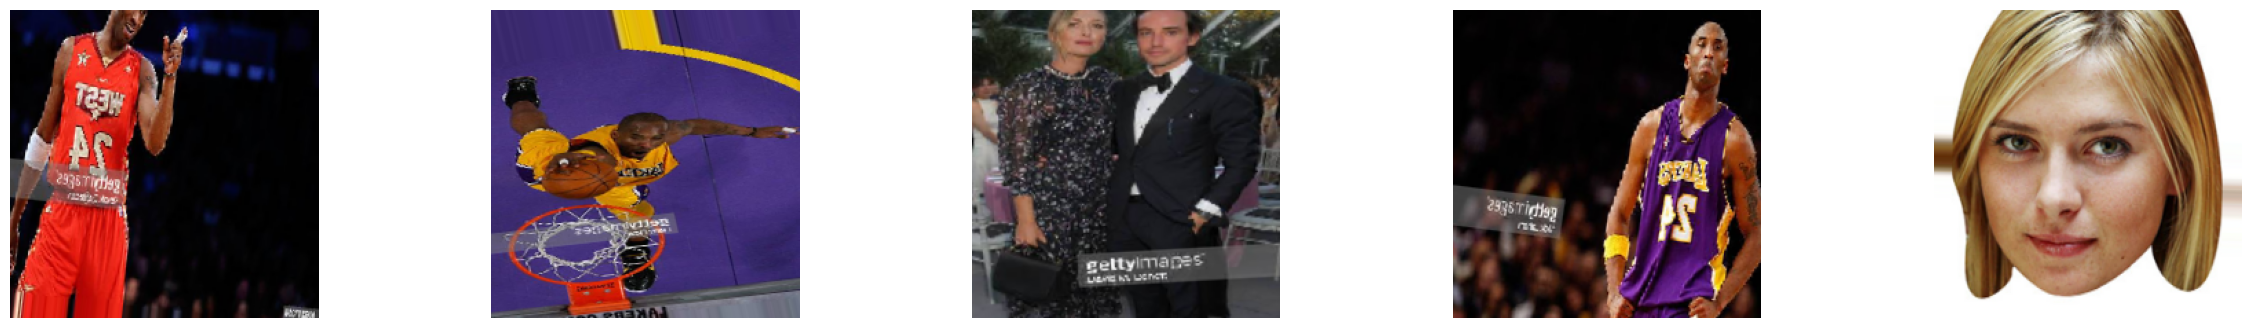

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers

base_dir = "IA/data_images"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    zoom_range=0.3,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)

print("Class indices:", train_generator.class_indices)

plt.figure(figsize=(30, 4))
f, axarr = plt.subplots(1, 5, figsize=(30, 4))

for i in range(5):
    images, labels = next(train_generator)
    axarr[i].imshow(images[0])
    axarr[i].axis("off")

plt.show()

<Figure size 640x480 with 0 Axes>

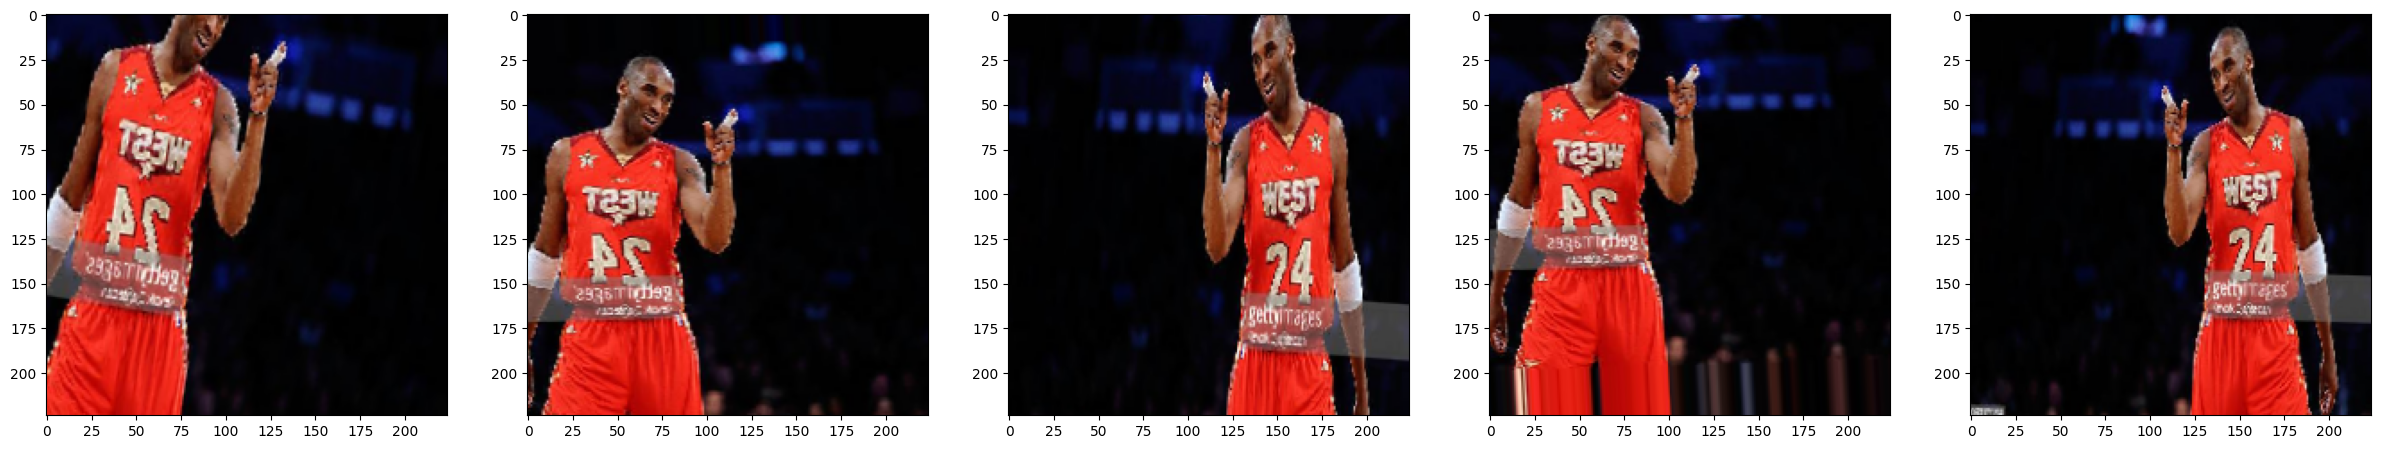

In [73]:
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

En este caso estamos tomando 8 imágenes y estomos modificando todas 1 vez cada una y las mostramos a manera de ejemplo.

(8, 224, 224, 3)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


<Figure size 640x480 with 0 Axes>

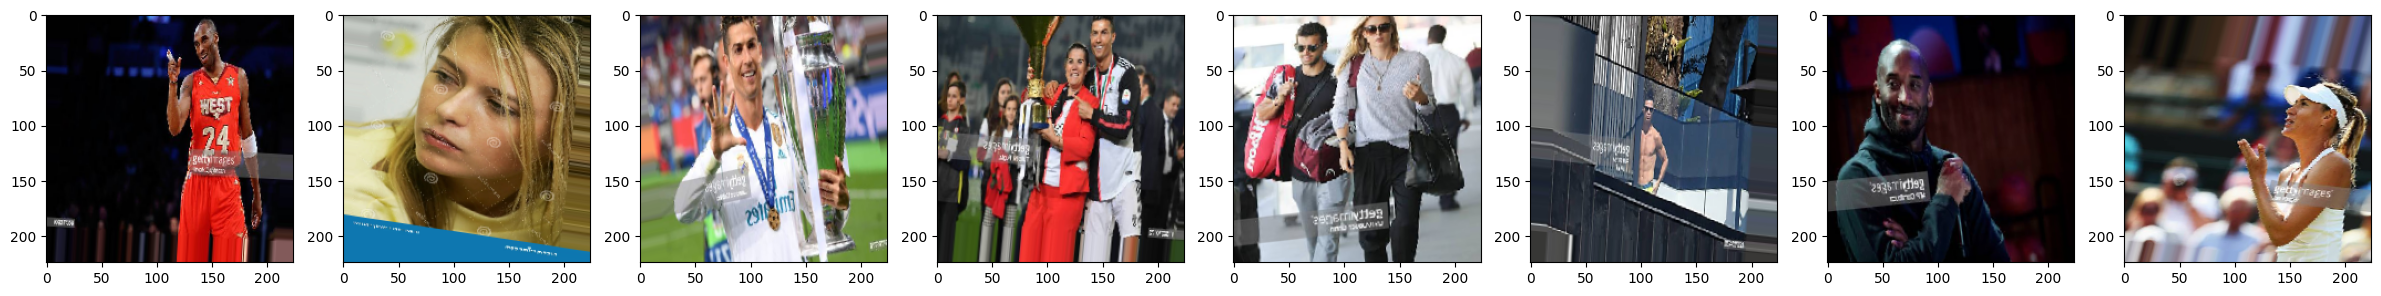

In [74]:
images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

/Users/randuretana/.pyenv/versions/3.12.5/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 52, 52, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 512)            │    88,605,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,977,539 (339.42 MB)

 Trainable params: 88,977,539 (339.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/Users/randuretana/.pyenv/versions/3.12.5/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 297ms/step - accuracy: 0.3717 - loss: 1.1206
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 343ms/step - accuracy: 0.4450 - loss: 1.0428
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 330ms/step - accuracy: 0.4707 - loss: 0.9694
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 339ms/step - accuracy: 0.5451 - loss: 1.0101
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 323ms/step - accuracy: 0.6117 - loss: 0.8794
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 301ms/step - accuracy: 0.6250 - loss: 0.8242
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 294ms/step - accuracy: 0.6979 - loss: 0.7892
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 292ms/step - accuracy: 0.6626 - loss: 0.7793
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 295ms/step - accuracy: 0.6821 - loss: 0.7358
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 293ms/step - accuracy: 0.6823 - loss: 0.7647
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 293ms/step - accuracy: 0.7025 - loss: 0.6966
Epoch 12/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 13

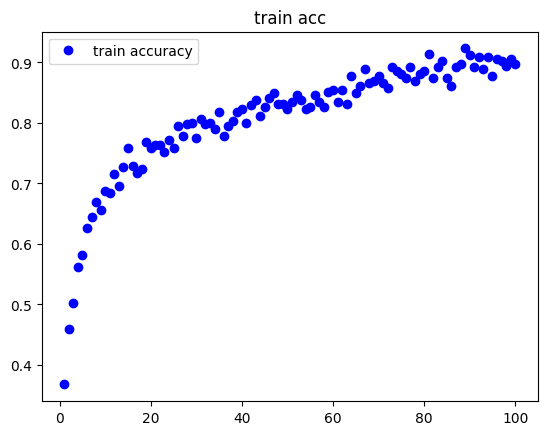

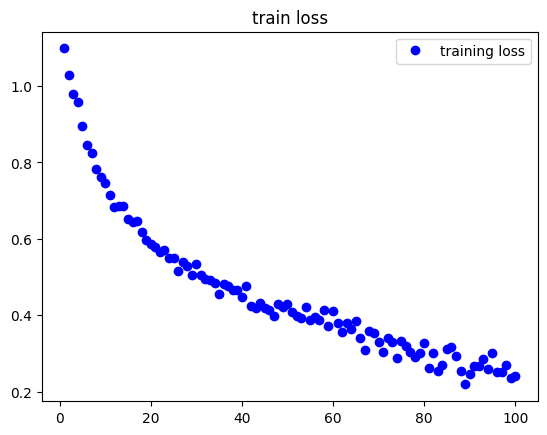

In [75]:
#version 2

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(3, activation='softmax'))


model.summary()

model.compile(loss='categorical_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['accuracy'])


history = model.fit(
	train_generator,
	epochs=100,
)

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()


In [76]:
import os

print("Classes detected:", os.listdir("IA/data_images"))

Classes detected: ['.DS_Store', 'Maria Sharapova', 'ronaldo', 'Kobe Bryant']


In [77]:
#version 3

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# superior layers 
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model2 = Model(inputs=base_model.input, outputs=predictions)

model2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(patience=3, factor=0.2)
]

history = model2.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=callbacks)

# Fine-tuning , unfreeze some layers of the base model
base_model.trainable = True
for layer in base_model.layers[:-20]:  # just unfreeze the last 20 layers
    layer.trainable = False

model2.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history_finetune = model2.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=callbacks)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.3996 - loss: 1.3711 - val_accuracy: 0.6512 - val_loss: 0.8393 - learning_rate: 1.0000e-04
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.5625 - loss: 0.9225 - val_accuracy: 0.8023 - val_loss: 0.6321 - learning_rate: 1.0000e-04
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.6097 - loss: 0.7857 - val_accuracy: 0.8256 - val_loss: 0.5681 - learning_rate: 1.0000e-04
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.7538 - loss: 0.6228 - val_accuracy: 0.8488 - val_loss: 0.4779 - learning_rate: 1.0000e-04
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8300 - loss: 0.4969 - val_accuracy: 0.8721 - val_loss: 0.4229 - learning_rate: 1.0000e-04
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.7962 - loss: 0.5260 - val_accuracy: 0.8256 - val_loss: 0.4469 - learning_rate: 1.0000e-04
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.8269 

Found 437 images belonging to 3 classes.


/Users/randuretana/.pyenv/versions/3.12.5/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 850ms/step - accuracy: 0.8919 - loss: 0.3380
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 454ms/step - accuracy: 0.9182 - loss: 0.2849


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 771ms/step - accuracy: 0.9072 - loss: 0.3048
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 431ms/step - accuracy: 0.9112 - loss: 0.2980
Model V1 - Loss: 0.30503690242767334, Accuracy: 0.8970251679420471
Model V2 - Loss: 0.29193198680877686, Accuracy: 0.9153317809104919


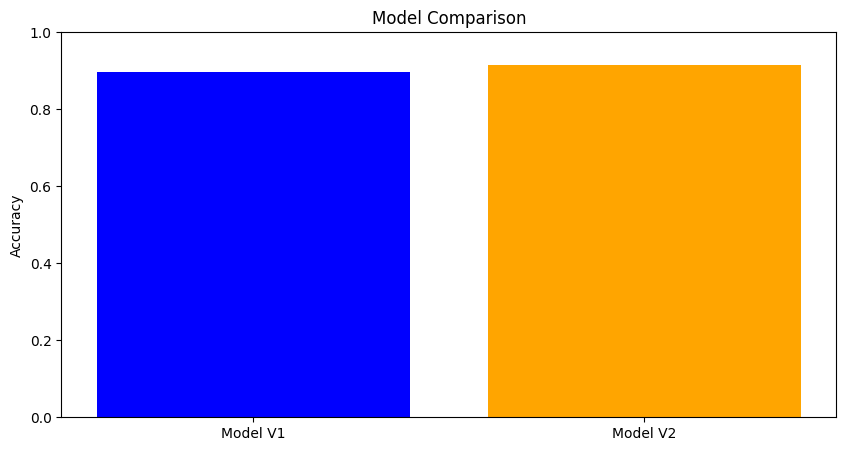

In [82]:
from tensorflow.keras.models import load_model

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical',
    shuffle=True
)

model.evaluate(test_generator)
model2.evaluate(test_generator)
#we save the model v2
model.save('model_v2_2.h5')
#we save the model v3
model2.save('model_v3_3.h5')

# Load the models
model_v1 = load_model('model_v2_2.h5')
model_v2 = load_model('model_v3_3.h5')

# Evaluate the models   
loss_v1, acc_v1 = model_v1.evaluate(test_generator)
loss_v2, acc_v2 = model_v2.evaluate(test_generator)
# Print the results
print(f"Model V1 - Loss: {loss_v1}, Accuracy: {acc_v1}")
print(f"Model V2 - Loss: {loss_v2}, Accuracy: {acc_v2}")
# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(['Model V1', 'Model V2'], [acc_v1, acc_v2], color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)
plt.show()




In [83]:
test_imgs = test_generator[0][0]
test_labels = test_generator[0][1]


predictions_model2 = model.predict(test_imgs)
predictions_model3 = model2.predict(test_imgs)
classes_x = np.argmax(predictions_model2,axis=1)
classes_x

classes_x2 = np.argmax(predictions_model3,axis=1)
classes_x2

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


array([0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 1, 1, 0, 2, 1, 2, 0,
       0, 2, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1,
       1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 0, 2, 2, 2,
       2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 0, 1, 1, 0,
       2, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1,
       2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2])

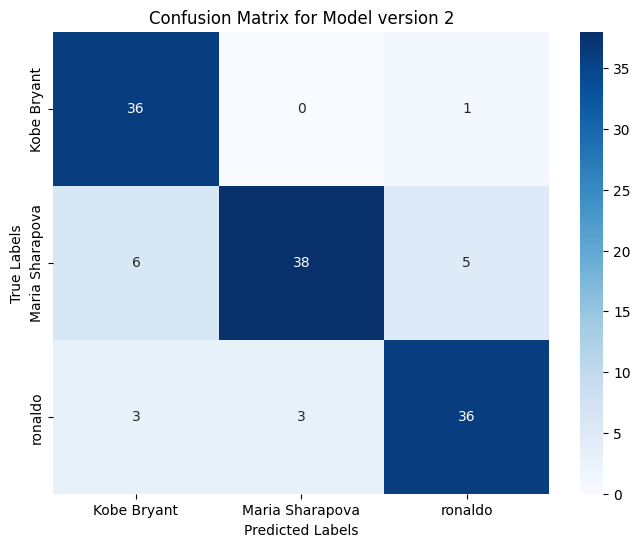

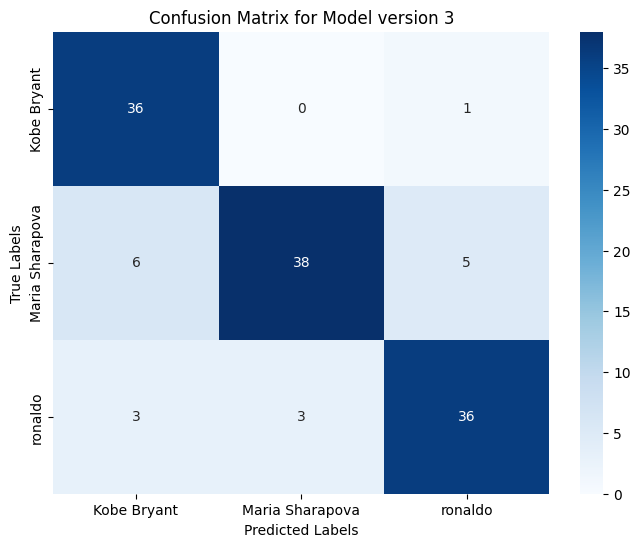

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

true_labels = np.argmax(test_labels, axis=1)

predicted_labels = np.argmax(predictions_model2, axis=1)
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(train_generator.class_indices.keys()),
            yticklabels=list(train_generator.class_indices.keys()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model version 2')
plt.show()


# Plotting the confusion matrix for model2
predicted_labels2 = np.argmax(predictions_model2, axis=1)
cm2 = confusion_matrix(true_labels, predicted_labels2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(train_generator.class_indices.keys()),
            yticklabels=list(train_generator.class_indices.keys()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model version 3')
plt.show()

Class Names: ['Kobe Bryant', 'Maria Sharapova', 'ronaldo']
Found 437 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


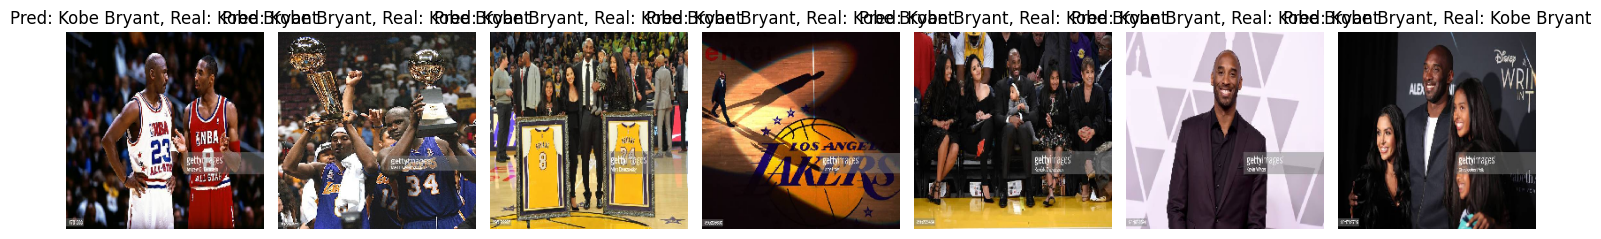

In [81]:
class_names = list(test_generator.class_indices.keys())
print("Class Names:", class_names)

#Visual test
test_datagen = ImageDataGenerator(rescale=1./255)
test_generatorVISUAL = test_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=7,
    class_mode='categorical',
    shuffle=False
)

images, labels_one_hot = next(test_generatorVISUAL)

predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)

true_labels = np.argmax(labels_one_hot, axis=1)

images_desnormalizadas = (images * 255).astype(np.uint8)

plt.figure(figsize=(15, 5))
for i in range(test_generatorVISUAL.batch_size):
    plt.subplot(1, test_generatorVISUAL.batch_size, i + 1)
    plt.imshow(images_desnormalizadas[i])
    predicted_label = class_names[predicted_classes[i]]
    true_label = class_names[true_labels[i]]
    plt.title(f"Pred: {predicted_label}, Real: {true_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()